In [1]:
import sys
if not '..' in sys.path:
    sys.path.append('..')

from pathlib import Path
from analysis import files, emg, analysis, collection
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

image_path = Path("/Users/spencer/phd/phd/images/")

import matplotlib as mpl
mpl.rcParams.update({'axes.labelsize': 16})

todo
- think about the lag from movement to on screen -- what makes this up? 
- order subjects by variance ratio mean-- can we group them? do they cluster? No
- look at only the last N blocks for means-- do we get subject grouping now? No


theory
- based on the variance ratio results, we think (most?) people aren't internalizing the decoder, we don't see a reduction in variance in the task space
- people aren't honing a flexible strategy because they don't seem to be "finding" the decoder
- this leads us to think that people are learning rote movements, they're not learning the decoder directly 
- we don't see people honing the decoder, as theyre disregarding the null space. 

predictions / hypotheses
- do we see evidence that people are using memory of rote movements to succeed in the task?
- do we see correlations between past hits and future hits? 
- do early successful trials correlate strongly with later trials? regardless of the null space?
- if we see repetition across trials in the null space, people are likely learning rote movements!
- are people making similar movements in the null space over trials?

what does similar mean?
- correlations in filtered EMG signals, being careful to avoid time shifting-- we need to convolve the signals and take the peak correlation? 
- PCA filtered EMG trials, look at correlations of the PCA components? This is just a filtering step, or...
- we get fancy and PCA some concatenated signal, looking for trends in features? E.g. This feature is seen across trials in terms of the feature weights over trials



In [2]:
collection_name = "emg_olympics"
subject_names = collection.get_subject_names(collection_name)
print(f"{len(subject_names)} subjects in {collection_name}.")
c = collection.Collection(collection_name)

46 subjects in emg_olympics.


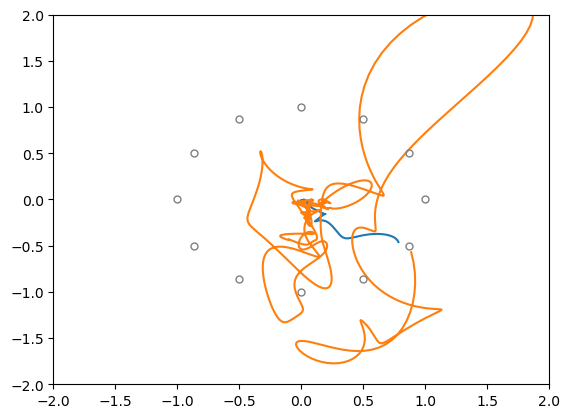

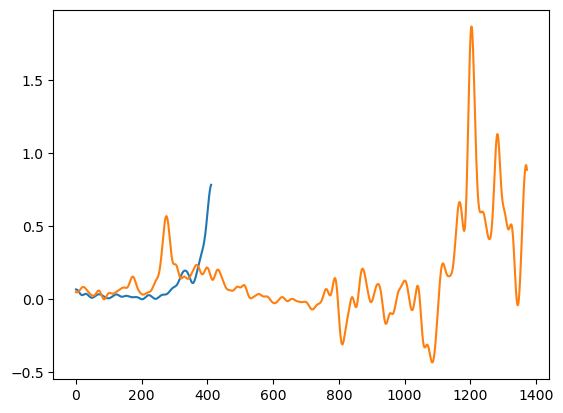

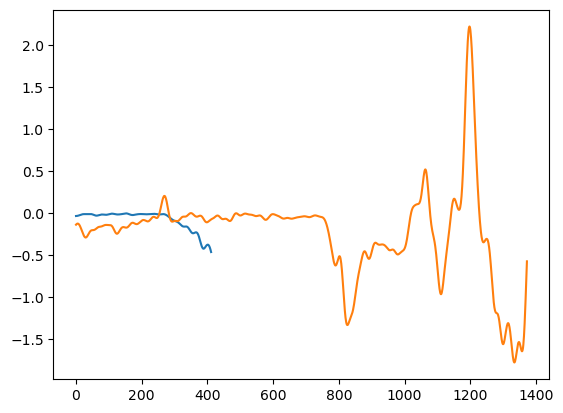

In [4]:
c = collection.Collection("emg_olympics")
subject_number = 1
s = c.subjects[c.subject_names[subject_number]]
trials = []
for sesh in s.tasks["center_hold"].sorted_sessions():
    trials.extend(sesh.sorted_trials())
target_number = 12

first_hit_trial = None
last_hit_trial = None
for t in trials:
    if t.target_number == target_number and t.outcome == "Hit":
        first_hit_trial = t
# print(first_hit_trial.session_name, first_hit_trial.number)

for t in trials[::-1]:
    if t.target_number == target_number and t.outcome == "Hit":
        last_hit_trial = t
# print(last_hit_trial.session_name, last_hit_trial.number)

first_traj = first_hit_trial.get_trajectory()
last_traj = last_hit_trial.get_trajectory()
first_emg = first_hit_trial.get_filtered_emg()
last_emg = last_hit_trial.get_filtered_emg()
plt.plot(first_traj[:,-2],first_traj[:,-1])
plt.plot(last_traj[:,-2],last_traj[:,-1])
analysis.plot_targets(plt.gca())
plt.xlim([-2,2])
plt.ylim([-2,2])

plt.figure()
plt.plot(first_traj[:,-2])
plt.plot(last_traj[:,-2])

plt.figure()
plt.plot(first_traj[:,-1])
plt.plot(last_traj[:,-1])

In [75]:
one_hot1 = np.zeros(shape=(64,1000))
one_hot1[:,500] = 1
one_hot2 = np.zeros(shape=(64,2000))
one_hot2[:,1500] = 1


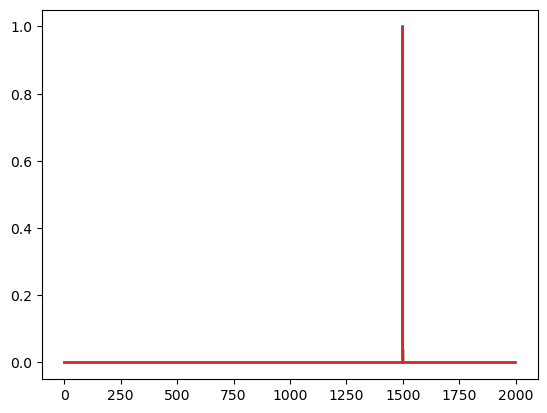